In [29]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import math

data = pd.read_csv('netflix_titles.csv')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [3]:
#넷플릭스에서 사라진 행 삭제하기
data = data[:len(data)-11]
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6218,80162994,TV Show,Talking Tom and Friends,NaN,"Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...","Cyprus, Austria, Thailand","April 10, 2019",2017,TV-G,2 Seasons,"Kids' TV, TV Comedies",Full of funny one-liners and always ready for ...
6219,80186475,TV Show,Pokémon the Series,NaN,"Sarah Natochenny, Laurie Hymes, Jessica Paquet...",Japan,"April 1, 2019",2019,TV-Y7-FV,2 Seasons,"Anime Series, Kids' TV",Ash and his Pikachu travel to the Alola region...
6220,70272742,TV Show,Justin Time,NaN,"Gage Munroe, Scott McCord, Jenna Warren",Canada,"April 1, 2016",2012,TV-Y,2 Seasons,Kids' TV,"In Justin's dreams, he and his imaginary frien..."
6221,80067942,TV Show,Terrace House: Boys & Girls in the City,NaN,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...",Japan,"April 1, 2016",2016,TV-14,2 Seasons,"International TV Shows, Reality TV",A new set of six men and women start their liv...
6222,70136122,TV Show,Weeds,NaN,"Mary-Louise Parker, Hunter Parrish, Alexander ...",United States,"April 1, 2014",2012,TV-MA,8 Seasons,"TV Comedies, TV Dramas",A suburban mother starts selling marijuana to ...


In [4]:
#사라졌나 확인
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6218,80162994,TV Show,Talking Tom and Friends,NaN,"Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...","Cyprus, Austria, Thailand","April 10, 2019",2017,TV-G,2 Seasons,"Kids' TV, TV Comedies",Full of funny one-liners and always ready for ...
6219,80186475,TV Show,Pokémon the Series,NaN,"Sarah Natochenny, Laurie Hymes, Jessica Paquet...",Japan,"April 1, 2019",2019,TV-Y7-FV,2 Seasons,"Anime Series, Kids' TV",Ash and his Pikachu travel to the Alola region...
6220,70272742,TV Show,Justin Time,NaN,"Gage Munroe, Scott McCord, Jenna Warren",Canada,"April 1, 2016",2012,TV-Y,2 Seasons,Kids' TV,"In Justin's dreams, he and his imaginary frien..."
6221,80067942,TV Show,Terrace House: Boys & Girls in the City,NaN,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...",Japan,"April 1, 2016",2016,TV-14,2 Seasons,"International TV Shows, Reality TV",A new set of six men and women start their liv...
6222,70136122,TV Show,Weeds,NaN,"Mary-Louise Parker, Hunter Parrish, Alexander ...",United States,"April 1, 2014",2012,TV-MA,8 Seasons,"TV Comedies, TV Dramas",A suburban mother starts selling marijuana to ...


# 5. 레트로 열풍
넷플릭스에서 가장 많은 시청시간을 기록한 컨텐츠는 20년도 더 된 옛날 미국 드라마입니다. (더 오피스, 프렌즈 등) OTT 에서 다시 한번 인기를 끌고 있는 '레트로 컨텐츠'들. 넷플릭스에 있는 레트로 컨텐츠에 대해 살펴보았습니다.

In [5]:
#date_added 를 계산하기 쉽게 연도만 분리하고 date_added_year column 추가

date_added_year = []
for i in data['date_added']:
    date_added_split = i.split(' ')
    if date_added_split[0] == '':
        del date_added_split[0]
    date_added_year.append(int(date_added_split[2]))

data['date_added_year'] = date_added_year
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6223 entries, 0 to 6222
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   show_id          6223 non-null   int64 
 1   type             6223 non-null   object
 2   title            6223 non-null   object
 3   director         4265 non-null   object
 4   cast             5654 non-null   object
 5   country          5749 non-null   object
 6   date_added       6223 non-null   object
 7   release_year     6223 non-null   int64 
 8   rating           6214 non-null   object
 9   duration         6223 non-null   object
 10  listed_in        6223 non-null   object
 11  description      6223 non-null   object
 12  date_added_year  6223 non-null   int64 
dtypes: int64(3), object(10)
memory usage: 632.1+ KB


In [6]:
# date_added_year - release_year 을 한 gap column 생성
data['release_year'] = pd.to_numeric(data['release_year'])
data['gap'] = data['date_added_year']-data['release_year']

In [7]:
#개봉한 지 20년이 지난 컨텐츠를 '레트로 컨텐츠'로 정의
# 개봉한 지 5~20년 된 컨텐츠는 '세미 레트로', 개봉한지 5년 미만인 컨텐츠는 '최신'으로 정의
#넷플릭스에 등록된 컨텐츠 중 레트로 컨텐츠의 수를 세 데이터프레임 생성

list_date_added = list(data['date_added_year'].drop_duplicates().sort_values())
df_retro = pd.DataFrame(columns= ['retro','semi','new'],index=list_date_added)
df_retro = df_retro.fillna(int(0))

for i in range(len(data)):
    index = data.loc[i,'date_added_year']
    if data.loc[i,'gap'] >= 20 :
        temp = df_retro.loc[index,'retro']
        df_retro.at[index,'retro'] = temp + 1
    elif ((data.loc[i,'gap']<20) & (data.loc[i,'gap']>=5)) :
        temp = df_retro.loc[index,'semi']
        df_retro.at[index,'semi'] = temp + 1
    else :
        temp = df_retro.loc[index,'new']
        df_retro.at[index,'new'] = temp + 1

df_retro['total'] = df_retro['retro']+df_retro['semi']+df_retro['new']
df_retro

,retro,semi,new,total
2008,0,0,2,2
2009,0,0,2,2
2010,1,0,0,1
2011,11,1,1,13
2012,1,0,6,7
2013,0,2,10,12
2014,2,2,21,25
2015,1,8,81,90
2016,13,76,367,456
2017,58,180,1062,1300


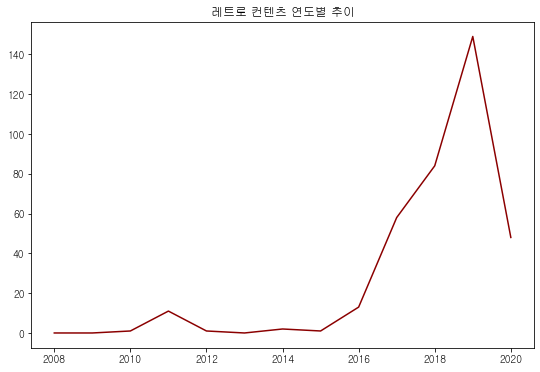

In [8]:
plt.rcParams["figure.figsize"] = (9,6)
plt.rcParams["font.family"] = 'gulim'

plt.title('레트로 컨텐츠 연도별 추이')
df_retro['retro'].plot(color = 'darkred')

plt.savefig('retro1.png')
plt.show()

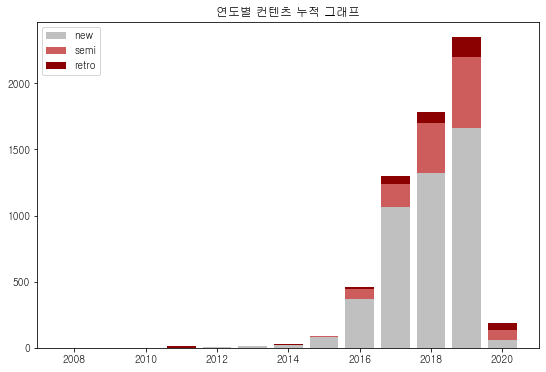

In [9]:
plt.title('연도별 컨텐츠 누적 그래프')
plt.bar(list_date_added,df_retro['new'],label='new',color='silver')
plt.bar(list_date_added,df_retro['semi'],bottom=df_retro['new'],label='semi',color='indianred')
plt.bar(list_date_added,df_retro['retro'],bottom=df_retro['new']+df_retro['semi'],label='retro',color='darkred') 
plt.legend()

plt.savefig('retro2.png')
plt.show()

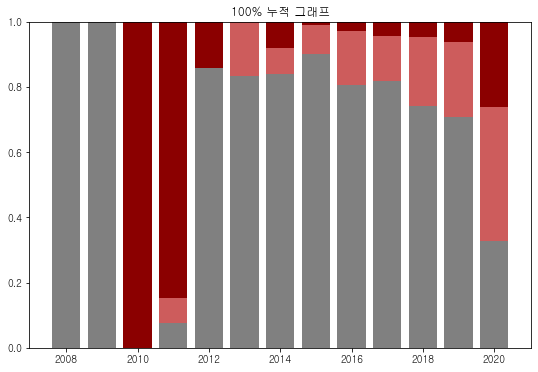

In [12]:
#100% 누적막대차트
df_retro['new_ratio'] = df_retro['new']/df_retro['total']
df_retro['semi_ratio'] = df_retro['semi']/df_retro['total']
df_retro['retro_ratio'] = df_retro['retro']/df_retro['total']
plt.title('100% 누적 그래프')
plt.bar(list_date_added,df_retro['new_ratio'],label='new',color='grey')
plt.bar(list_date_added,df_retro['semi_ratio'],bottom=df_retro['new_ratio'],label='semi',color='indianred')
plt.bar(list_date_added,df_retro['retro_ratio'],bottom=df_retro['new_ratio']+df_retro['semi_ratio'],label='retro',color='darkred') 
plt.savefig('retro3.png')
plt.show()


# 6. 넷플릭스가 좋아하는 배우 조합은?
(1) 넷플릭스 내 컨텐츠에 출연이 잦은 배우는 누구일까?
(2) 자주 출연한 배우와 그와 호흡을 맞춘 배우들

### dict_cast 생성
columns : 'name' (배우 이름), 'num' (출연 횟수)

In [13]:
# tv show 와 movie 데이터 분리
tvshow = data[data['type'] == 'TV Show']
movie = data[data['type']=='Movie']

In [14]:
#배우 이름과 그가 출연한 횟수를 column으로 갖는 데이터프레임 생성
list_cast = []
for i in data['cast'] :
    if pd.isnull(i):continue
    else:
        for j in i.split(', '):
            list_cast.append(j)
dict_cast = {}
for lst in list_cast :
    try : dict_cast[lst] += 1
    except : dict_cast[lst] = 1
df_cast = pd.DataFrame({'name':list(dict_cast.keys()),'num':list(dict_cast.values())})

In [15]:
df_cast.head()
len(df_cast)

27368

In [16]:
#내림차순으로 정렬
df_cast = df_cast.sort_values(by=['num'],axis=0,ascending=False)
df_cast

,name,num
5287,Anupam Kher,33
3212,Shah Rukh Khan,30
2066,Naseeruddin Shah,27
5027,Om Puri,27
764,Akshay Kumar,26
...,...,...
11972,Mariam El Khosht,1
11971,Heba Abdelghany,1
11970,Heba Abdelaziz,1
11969,Tayam Amar,1


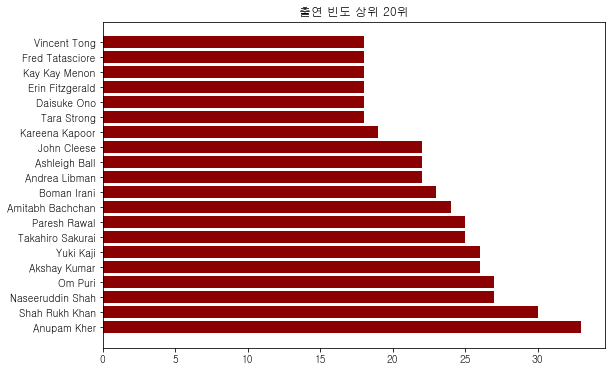

In [17]:
plt.title('출연 빈도 상위 20위')
plt.barh(df_cast['name'][:20],df_cast['num'][:20],color = 'darkred')
plt.savefig('network.png')
plt.show()

* 인도 출신 배우가 상위랭크를 차지하고 있음
* 인도 배우는 잘 모르기 때문에.. 미국 작품에 한해 다시 barplot을 만들어 보겠음

In [18]:
#United States의 데이터만 필터링
data_us = data[(data['type']=='Movie')& (data['country']=='United States')]

In [19]:
list_cast = []
for i in data_us['cast'] :
    if pd.isnull(i):continue
    else:
        for j in i.split(', '):
            list_cast.append(j)
dict_cast = {}
for lst in list_cast :
    try : dict_cast[lst] += 1
    except : dict_cast[lst] = 1
df_cast = pd.DataFrame({'name':list(dict_cast.keys()),'num':list(dict_cast.values())})

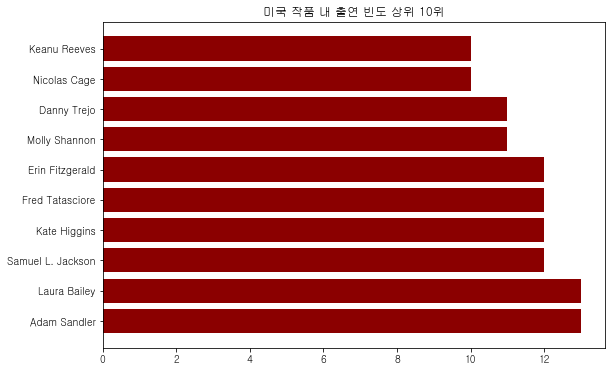

In [20]:
df_cast_top10 = df_cast.sort_values(by=['num'],axis=0,ascending=False).head(10)

plt.title('미국 작품 내 출연 빈도 상위 10위')
plt.barh(df_cast_top10['name'],df_cast_top10['num'],color = 'darkred')
plt.savefig('network_us.png')
plt.show()

In [21]:
list_cast = []
for i in data_us['director'] :
    if pd.isnull(i):continue
    else:
        list_cast.append(i)
dict_cast = {}
for lst in list_cast :
    try : dict_cast[lst] += 1
    except : dict_cast[lst] = 1
df_director = pd.DataFrame({'name':list(dict_cast.keys()),'num':list(dict_cast.values())})

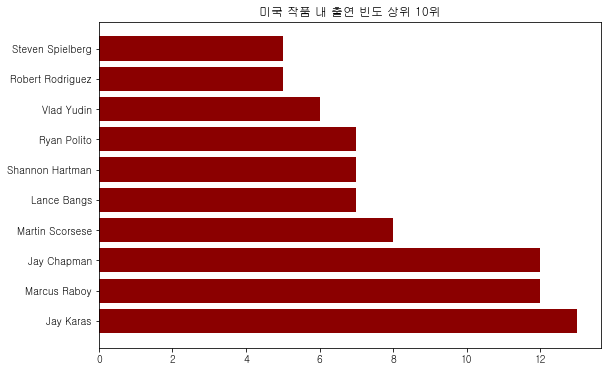

In [22]:
df_director_top10 = df_director.sort_values(by=['num'],axis=0,ascending=False).head(10)

plt.title('미국 작품 내 출연 빈도 상위 10위')
plt.barh(df_director_top10['name'],df_director_top10['num'],color = 'darkred')
plt.savefig('network_us_director.png')
plt.show()

### cast 네트워크 시각화

In [23]:
#네트워크 생성에 필요한 노드와 엣지를 저장하는 함수

def make_node_edge(actor) :
    global node,edge
    dict_edge = {}
    for i in data_us['cast'] :
        if pd.isnull(i):continue
        else:
            casts = i.split(', ')
            if actor in casts:
                for j in casts:
                    node.append(j)
                    if j != actor :
                        if j not in dict_edge : dict_edge[j] = 1
                        else : dict_edge[j] += 1
                        
    node = list(set(node))
    
    for i in dict_edge.items():
        l =[actor]
        cast, weight = i
        l.append(cast)
        l.append(weight)
        edge.append(l)
                

In [24]:
node = []
edge = []
make_node_edge('Adam Sandler') #배우 이름 인수로

C:\Users\qorwl\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\qorwl\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


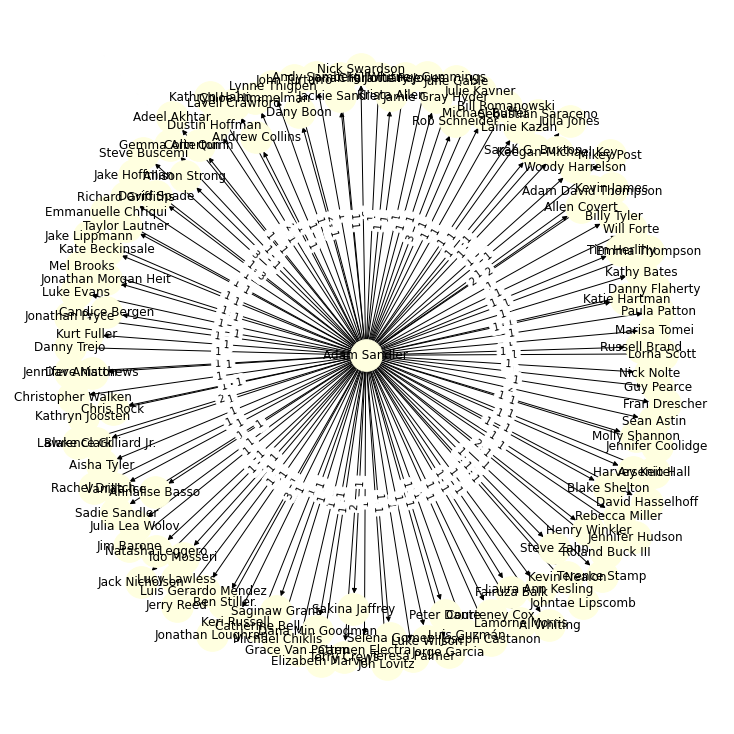

In [25]:
#네트워크로 시각화하기
import networkx as nx

G = nx.DiGraph()

G.add_nodes_from(node)
G.add_weighted_edges_from(edge)
labels = nx.get_edge_attributes(G,'weight')
pos=nx.spring_layout(G)

plt.figure(figsize=(10,10))
nx.draw(G,pos=pos,with_labels=True,node_color = 'lightyellow',node_size = 1000)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.savefig('network.png')
plt.show()

* node 가 너무 많아요.. 가중치가 1인 edge는 삭제하고 시각화해봅시다

In [26]:
# weight=1 인 네트워크 필터링
edge_new = []
node_new = []
for i in range(len(edge)) :
    if edge[i][2] != 1 : 
        edge_new.append(edge[i])
        node_new.append(edge[i][1])

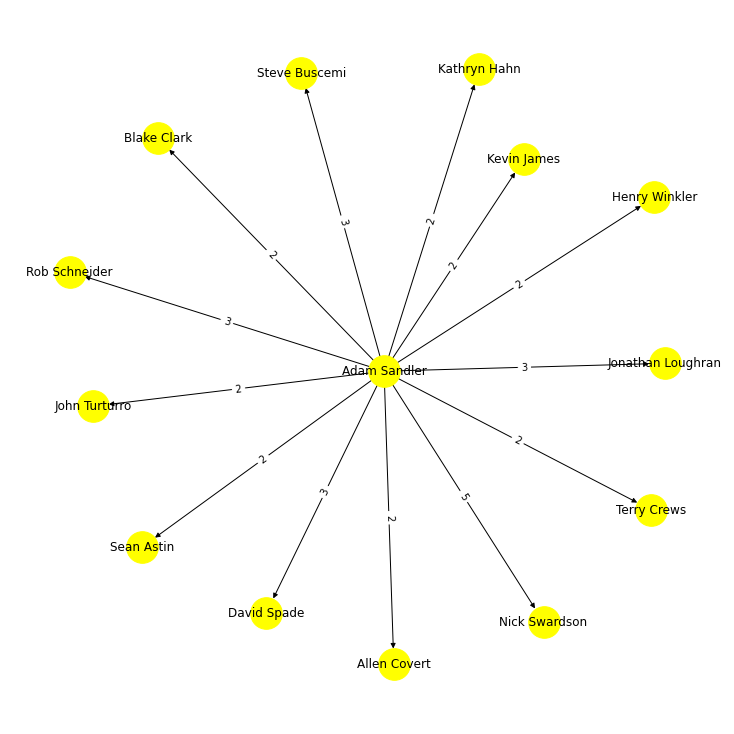

In [27]:
G = nx.DiGraph()

G.add_nodes_from(node_new)
G.add_weighted_edges_from(edge_new)
labels = nx.get_edge_attributes(G,'weight')
pos=nx.spring_layout(G)

#G.degree
plt.figure(figsize=(10,10))
nx.draw(G,pos=pos,with_labels=True,node_color = 'yellow',node_size = 1000)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.savefig('network2.png')
plt.show()

### director & cast network

In [107]:
#네트워크 생성에 필요한 노드와 엣지를 저장하는 함수

def make_node_edge_d(director) :
    global node,edge
    dict_edge = {}
    
    data_director = data[data['director'] == director ]
    for i in data_director['cast'] :
        if pd.isnull(i):continue
        else:
            casts = i.split(', ')
            for j in casts:
                node.append(j)
                if j not in dict_edge : dict_edge[j] = 1
                else : dict_edge[j] += 1
                for i in casts :
                    if (i,j) not in dict_edge : dict_edge[(i,j)] = 1
                    else : dict_edge[(i,j)] += 1 
                    
                    
    node = list(set(node))
    
    for i in dict_edge.items():
        cast, weight = i
        if isinstance(cast, tuple) :
            l = list(cast)
            l.append(weight)
            edge.append(l)
        else :
            l =[director]
            l.append(cast)
            l.append(weight)
            edge.append(l)
                

In [108]:
node = []
edge= []
director = input('Director name : ')
make_node_edge_d(director)

Director name :  Steven Spielberg


In [102]:
print(node)
print(edge)

['Ed Harris', 'Daniel Henshall', 'Tilda Swinton', 'Chris Evans', 'Yoon Je Moon', 'Luke Pasqualino', 'Song Kang-ho', 'Lily Collins', 'Jamie Bell', 'Jake Gyllenhaal', 'Woo Shik Choi', 'An Seo Hyun', 'Octavia Spencer', 'Shirley Henderson', 'Ko A-sung', 'John Hurt', 'Ewen Bremner', 'Giancarlo Esposito', 'Alison Pill', 'Adnan Haskovic', 'Paul Dano', 'Devon Bostick', 'Steven Yeun', 'Byun Heebong', 'Vlad Ivanov']
[['Bong Joon Ho', 'Chris Evans', 1], ['Chris Evans', 'Chris Evans', 1], ['Song Kang-ho', 'Chris Evans', 1], ['Ed Harris', 'Chris Evans', 1], ['John Hurt', 'Chris Evans', 1], ['Tilda Swinton', 'Chris Evans', 1], ['Jamie Bell', 'Chris Evans', 1], ['Octavia Spencer', 'Chris Evans', 1], ['Ewen Bremner', 'Chris Evans', 1], ['Alison Pill', 'Chris Evans', 1], ['Adnan Haskovic', 'Chris Evans', 1], ['Vlad Ivanov', 'Chris Evans', 1], ['Ko A-sung', 'Chris Evans', 1], ['Luke Pasqualino', 'Chris Evans', 1], ['Bong Joon Ho', 'Song Kang-ho', 1], ['Chris Evans', 'Song Kang-ho', 1], ['Song Kang-ho', 

In [113]:
edge_new = []
node_new = []
for i in range(len(edge)) :
    if edge[i][2] >= 2 :
        edge_new.append(edge[i])
        node_new.append(edge[i][1])

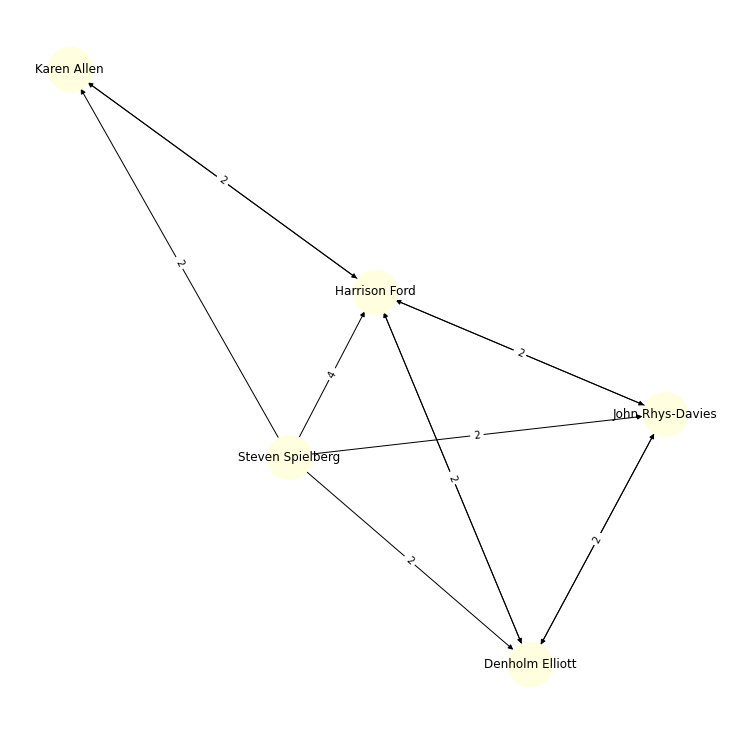

In [114]:
import networkx as nx

G = nx.DiGraph()

G.add_nodes_from(node_new)
G.add_weighted_edges_from(edge_new)
labels = nx.get_edge_attributes(G,'weight')
pos=nx.spring_layout(G)

plt.figure(figsize=(10,10))
nx.draw(G,pos=pos,with_labels=True,node_color = 'lightyellow',node_size = 2000)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.savefig('network_spielberg_2.png')
plt.show()